Mounted at /content/drive


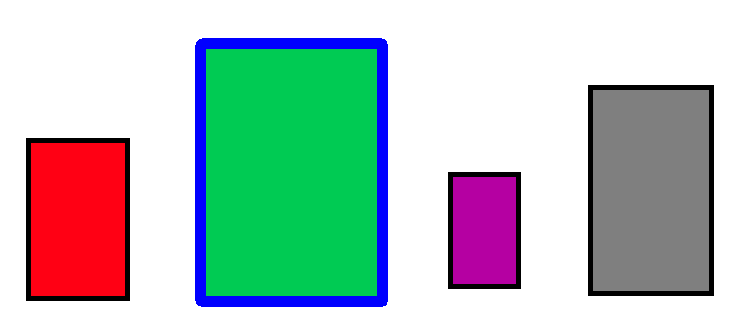

In [1]:
from google.colab import drive

drive.mount('/content/drive')

import cv2

from google.colab.patches import cv2_imshow

image=cv2.imread("/content/drive/MyDrive/Rectangles.png")
# Next, we read in the image, which in this case is , Containers.png

original_image = image
# We create the variable, original_image, to store the original image that will undergo modification throughout the code.

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 200)
# We create a grayscale version of the image and then find the Canny edges, which helps simplify the image for cvs.findContours() function. The cv2.findContours() function finds all external contours in our image, which finds the unique objects in an image.

contours, hierarchy = cv2.findContours(
    edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


cv2.destroyAllWindows()


def get_contour_areas(contours):

    all_areas = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas
#We then create a function that finds all the areas of each of the contours in our image and stores this in a list in the variable, all_areas. This function returns this list.

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# We then sort this list from largest to smallest using the sorted() function. We store this sorted list into the variable, sorted_contours. We sort a list from largest to smallest by the attribute, reverse = True. To sort a list from smallest to largest by the attribute, reverse = False, or by specifying nothing in the reverse attribute, as reverse = False, is implied if not specified.

largest_item = sorted_contours[0]
# Now that the list is sorted from largest to smallest, the first item in the list is the largest item, which represents the largest object in our image. We get the largest item with the code, largest_item = sorted_contours[0]
# Lists always started with an index of 0. So the 0 index item is the first item and , thus, the largest object.

cv2.drawContours(original_image, largest_item, -1, (255, 0, 0), 10)
# We then outline this largest object in blue with the drawContours() function.In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

cv2.waitKey(0)
img = cv2.imread('Largest Object')
cv2_imshow(original_image)

cv2.waitKey(0)
cv2.destroyAllWindows()